In [2]:
import pandas as pd
import snorkel
import matplotlib.pyplot as plt
from snorkel.labeling import labeling_function
from snorkel.labeling import LFAnalysis
from snorkel.labeling.model import MajorityLabelVoter
from snorkel.labeling import PandasLFApplier
from snorkel.labeling.model import LabelModel
import seaborn as sns

/Users/chuli/opt/anaconda3/envs/PSML/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# read in the training data
df_train = pd.read_csv("data/processed-labels/training_set_seattle_4.csv")
df_train.head()

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,...,geometry,clustered,count,false_positive,distance,tag_list,description,tag_count,way_type,intersection_distance
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.7500,-15.625,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.3327865600586 47.61859893798828),0.0,1.0,0,5.435411,0.0,0.0,0.0,residential,59.130699
1,85057,Obstacle,2.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,38.3750,-21.875,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.3318862915039 47.61780548095703),0.0,7.0,0,12.187807,0.0,1.0,0.0,-1,-1.000000
2,85059,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.1875,-24.500,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.33183288574219 47.61751174926758),1.0,6.0,0,1.261442,0.0,0.0,0.0,tertiary,37.121175
3,85060,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.1875,-24.500,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.33187866210938 47.61751937866211),0.0,4.0,0,0.859638,0.0,0.0,0.0,tertiary,33.832501
4,85062,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,257.1875,-35.000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.33204650878906 47.617637634277344),0.0,6.0,0,2.443982,0.0,0.0,0.0,tertiary,46.324623


In [4]:
#select only label_type = curb ramp
df_train = df_train[df_train['label_type'] == 'CurbRamp']
df_train

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,...,geometry,clustered,count,false_positive,distance,tag_list,description,tag_count,way_type,intersection_distance
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.75000,-15.625000,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.3327865600586 47.61859893798828),0.0,1.0,0,5.435411,0.0,0.0,0.0,residential,59.130699
2,85059,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.18750,-24.500000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.33183288574219 47.61751174926758),1.0,6.0,0,1.261442,0.0,0.0,0.0,tertiary,37.121175
3,85060,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.18750,-24.500000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.33187866210938 47.61751937866211),0.0,4.0,0,0.859638,0.0,0.0,0.0,tertiary,33.832501
4,85062,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,257.18750,-35.000000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.33204650878906 47.617637634277344),0.0,6.0,0,2.443982,0.0,0.0,0.0,tertiary,46.324623
5,85068,CurbRamp,1.0,qzzOihXh8f6fpAKK9ttmUQ,1,240.31250,-28.437500,220.271088,-0.452202,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,...,POINT (-122.3329086303711 47.616973876953125),1.0,3.0,0,0.959448,0.0,0.0,0.0,primary,50.769474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178950,231222,CurbRamp,1.0,gMZCijQWYviUCG588WlFTw,2,354.84375,-25.977678,52.083549,-0.176730,155af0a9-4149-4436-8aa3-7573e160036d,...,POINT (-122.26596069335938 47.55414962768555),0.0,9.0,0,19.256658,0.0,0.0,0.0,residential,30.613478
178958,231270,CurbRamp,1.0,R-sTl5O6sOdVPurgTWy3EQ,1,332.46875,-35.000000,215.130295,-0.157570,155af0a9-4149-4436-8aa3-7573e160036d,...,POINT (-122.26725769042969 47.540771484375),1.0,10.0,0,19.281464,0.0,0.0,0.0,residential,33.457578
178960,231338,CurbRamp,1.0,d3oBrJ-nDtKMwlE7svc6pg,1,253.56250,-35.000000,177.959915,-0.962440,3ac3d4de-a70a-48ec-b46e-498d6e26ee6c,...,POINT (-122.28179168701172 47.563270568847656),0.0,9.0,1,14.445776,0.0,0.0,0.0,residential,152.820404
178961,231339,CurbRamp,1.0,AOIBJ12BjFanDJF1Ark05Q,1,110.31250,-35.000000,179.365723,-1.093400,3ac3d4de-a70a-48ec-b46e-498d6e26ee6c,...,POINT (-122.28165435791016 47.56346893310547),0.0,9.0,1,20.171446,0.0,0.0,0.0,residential,225.060263


In [5]:
# read in gt.csv file
df_test = pd.read_csv('data/processed-labels/test_set_seattle_4.csv')
#select only label_type = curb ramp
df_test = df_test[df_test['label_type'] == 'CurbRamp']
Y_test = df_test.verified.values

## Labeling functions based on heuristics

In [6]:
# Define the label mappings for convenience
NOT_SURE = -1
WRONG = 0
CORRECT = 1

In [7]:
df_train['way_type'].unique()

array(['residential', 'tertiary', 'primary', 'secondary', 'living_street',
       'unclassified', 'tertiary_link', 'primary_link', 'crossing',
       'trunk', 'secondary_link', 'busway', 'trunk_link'], dtype=object)

### intersection

In [990]:
# @labeling_function()
# def intersection(x):
#     #if way_type is residential and intersection_distance is greater than 40, return WRONG, else return NOT_SURE
#     #if x["way_type"] == 'tertiary' and x["intersection_distance"] >= 80:
#         #return WRONG
#     if x["way_type"] == 'residential' and x["intersection_distance"] >= 60:
#         #return WRONG
#     #elif x["way_type"] == 'living_street' and x["intersection_distance"] >= 80:
#         #return WRONG
#     #elif x["way_type"] == 'secondary' and x["intersection_distance"] >= 80:
#         #return WRONG
#     else:
#         return NOT_SURE

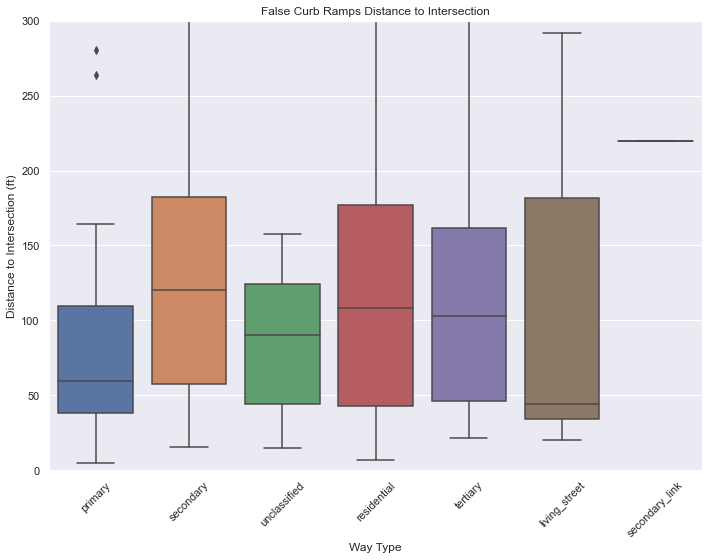

In [11]:
#select df_test.verified.values == 1
false_curb_ramps = df_test[df_test['verified'] == 0]
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="way_type", y="intersection_distance", data=false_curb_ramps)
ax.set_title('False Curb Ramps Distance to Intersection')
ax.set_xlabel('Way Type')
ax.set_ylabel('Distance to Intersection (ft)')
#rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)
#zoom in on y-axis
plt.ylim(0, 300)
plt.show()

In [117]:
# @labeling_function()
# def intersection(x):
#     #return WRONG if x["intersection_distance"] >= 120 and x["way_type"] =='residential' else NOT_SURE
#     return WRONG if x["way_type"] =='residential' and x["intersection_distance"] >= 120 else NOT_SURE

In [299]:
@labeling_function()
def intersection(x):
    if x["way_type"] =='residential' and x["intersection_distance"] >= 120:
        return WRONG 
    elif x["way_type"] =='living_street' and x["intersection_distance"] >= 120:    
        return WRONG
    # elif x["way_type"] =='tertiary' and x["intersection_distance"] >= 50:    
    #     return WRONG
    else:
        return NOT_SURE

### cluster

In [300]:
#check if the label is in the cluster
@labeling_function()
def clustered(x):
    # x in this case is a row of the dataframe
    return CORRECT if x['count'] >= 2 else NOT_SURE

### severity

In [301]:
#check if it is a severity 4 or higher
@labeling_function()
def severity(x):
    # x in this case is a row of the dataframe
    return CORRECT if x["severity"] >= 4 else NOT_SURE

### gsv

In [302]:
#check if the user zoomed in
@labeling_function()
def zoom(x):
    # x in this case is a row of the dataframe
    if x["zoom"] > 2:
        return CORRECT
    elif x["zoom"] == 1:
        return WRONG
    else:
        return NOT_SURE

### optional input

In [303]:
#check if the user has put a tag
@labeling_function()
def tags(x):
    # x in this case is a row of the dataframe
    return CORRECT if x['tag_list']  == 1 else NOT_SURE

In [304]:
#check if the user has put a comment
@labeling_function()
def description(x):
    # x in this case is a row of the dataframe
    return CORRECT if x['description']  == 1 else NOT_SURE

In [305]:
#check for distance to the curb
@labeling_function()
def distance(x):
    # x in this case is a row of the dataframe
    return WRONG if x['distance']  >= 40 else NOT_SURE

In [306]:
lfs = [
    intersection, 
    clustered,
    severity,
    zoom,
    tags, 
    description,
    #distance
    ]

In [307]:
applier = PandasLFApplier(lfs=lfs)

In [308]:
L_train = applier.apply(df=df_train)
L_test = applier.apply(df=df_test)

100%|██████████| 5333/5333 [00:00<00:00, 39231.69it/s]


In [309]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
intersection,0,[0],0.044433,0.043952,0.038945
clustered,1,[1],0.940006,0.774225,0.549653
severity,2,[1],0.018687,0.018645,0.011006
zoom,3,"[0, 1]",0.765950,0.732805,0.551705
tags,4,[1],0.213128,0.210567,0.118447
description,5,[1],0.006422,0.006380,0.003027


In [310]:
majority_model = MajorityLabelVoter()
preds_train = majority_model.predict(L=L_train)

In [311]:
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/500 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=1.141]
INFO:root:[100 epochs]: TRAIN:[loss=0.001]
INFO:root:[200 epochs]: TRAIN:[loss=0.001]
INFO:root:[300 epochs]: TRAIN:[loss=0.000]
100%|██████████| 500/500 [00:00<00:00, 3281.20epoch/s]
INFO:root:Finished Training


In [312]:
majority_acc = majority_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.1f}%")

label_model_acc = label_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.1f}%")

Majority Vote Accuracy:   74.1%
Label Model Accuracy:     87.3%
